In [1]:
# this only draws the images, not interactive / zoom-able
%matplotlib inline

In [2]:
"""
==================================
Parallelization of Log-BP decoding
==================================

This example shows how coding and decoding can be done in parallel to speed
up computations.
"""

from time import time

import numpy as np

from matplotlib import pyplot as plt

from pyldpc import make_ldpc, decode, encode

n = 100
d_v = 2
d_c = 5
seed = 42
rng = np.random.RandomState(seed)

In [3]:
##################################################################
# First we create an LDPC code i.e a pair of decoding and coding matrices
# H and G. H is a regular parity-check matrix with d_v ones per row
# and d_c ones per column

H, G = make_ldpc(n, d_v, d_c, seed=seed, systematic=True, sparse=True)

n, k = G.shape
print("Number of coded bits:", k)

Number of coded bits: 61


In [4]:
##################################################################
# Now we simulate transmission for different levels of noise and
# compute the percentage of errors using the bit-error-rate score
# To parallelize coding and decoding, simply stack the messages as columns:

n_messages = np.arange(1, 20)
n_runs = 50
snr = 10
times_parallel = []
times_sequential = []

for pp in n_messages:
    t_parallel = 0
    t_seq = 0
    V = rng.randint(2, size=(k, pp))  # simulate messages
    Y = encode(G, V, snr, seed=seed)

    for _ in range(n_runs):
        t = time()
        decode(H, Y, snr)
        t_parallel += time() - t

        t = time()
        for y in Y.T:
            decode(H, y, snr)
        t_seq += time() - t
    times_sequential.append(t_seq / n_runs)
    times_parallel.append(t_parallel / n_runs)

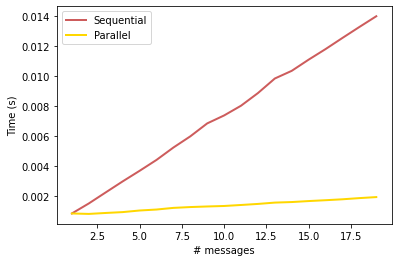

In [5]:
plt.figure()
plt.plot(n_messages, times_sequential, color="indianred", lw=2,
         label="Sequential")
plt.plot(n_messages, times_parallel, color="gold", lw=2, label="Parallel")
plt.ylabel("Time (s)")
plt.xlabel("# messages")
plt.legend()
plt.show()